# Code Execution with Energy Profiling

In [1]:
# Import modules
import json
import lassi.code_manager
from lassi.get_power import report_gpu_memory
from lassi.format_colors import color

# Load config file with source application names and input parameters
with open("source_apps.json", "r") as f:
    source_apps = json.load(f)
source_collection = "HeCBench"

### Input App and Refactored Code file name

In [2]:
# >>>>> STEP 1: Enter source code folder and app name
# folder = "test_codes"
folder = "test_codes"
# app_name = "jacobi"
# app_name = 'all-pairs-distance'
app_name = 'stu-matrix-rotate'

# >>>>> STEP 2: Enter your refactored code file name
# Code file should be uploaded to the same app folder under test_codes
# refactorcode_filename = "jacobi-example_refactored.cu"
# refactorcode_filename = "all-pairs-distance-cuda_main-lassi_refactored.cu"
refactorcode_filename = "stu-matrix-rotate-cuda_main-refactored.cu"

### Run the following cells

No changes are necessary unless you want to customize code location or execution input parameters.

In [3]:
# Source code - open and read code file
sourcecode_filename = app_name + "-cuda_main.cu"
sourcecode_filename = app_name + "-cuda_main-refactored.cu"
# sourcecode_filename = app_name + "-cuda_main-lassi_refactored.cu"

sourcecode_dir = folder + "/" + app_name + "/" + sourcecode_filename
with open(sourcecode_dir, 'r') as file:
    source_code = file.read()
file.close()

# Code to test - open and read code file
refactoredcode_dir = folder + "/" + app_name + "/" + refactorcode_filename
with open(refactoredcode_dir, 'r') as file:
    refactored_code = file.read()
file.close()

# Enter execution input parameters for the code to be tested
# A list of parameter string values, e.g., ["10000", "1"]
exe_input_parameters = source_apps[source_collection][app_name]["app_params"]

# Parameters
power_measure = True  # False if you cannot measure power on NVIDIA GPU
source_language = "CUDA"
target_language = "CUDA"
build_script = False
code_compiler = "nvcc"
code_compiler_kwds = "-std=c++14 -Xcompiler -Wall -arch=sm_80 -O3"
# -arch=sm_80 for A100s  # -arch=sm_60 for P100

print("\n----- " + color.BLUE + color.BOLD + "All code and parameters loaded." + color.END + "-----\n")


----- All code and parameters loaded.-----





----- > SOURCE CODE < -----

Compile command: ['nvcc', '-std=c++14', '-Xcompiler', '-Wall', '-arch=sm_80', '-O3', 'test_codes/stu-matrix-rotate/stu-matrix-rotate-cuda_main-refactored.cu', '-o', 'test_codes/stu-matrix-rotate/stu-matrix-rotate-cuda_main-refactored']

Compilation of code successful!


----- >>> System check BEFORE exe code...

----- GPU Memory Status:
 GPU 0: 665 MiB used, 45403 MiB free, 46068 MiB total

----- GPU State:
clocks.current.graphics [MHz], clocks.current.sm [MHz], power.draw [W], pstate
210 MHz, 210 MHz, 43.66 W, P8



Waiting for the system to settle down for 5 seconds...: 100%|██████████| 5/5 [00:05<00:00,  1.00s/it]


Working directory: test_codes/stu-matrix-rotate
Execute command: ['./stu-matrix-rotate-cuda_main-refactored', '30000', '100']


----- < BEGIN: STANDARD OUTPUT FROM CODE EXECUTION > -----

Average kernel execution time: 0.085708 (s)

----- < END: Standard Output > -----

GPU power data has been written to CUDA_CUDA_gpu_net_power_results.csv


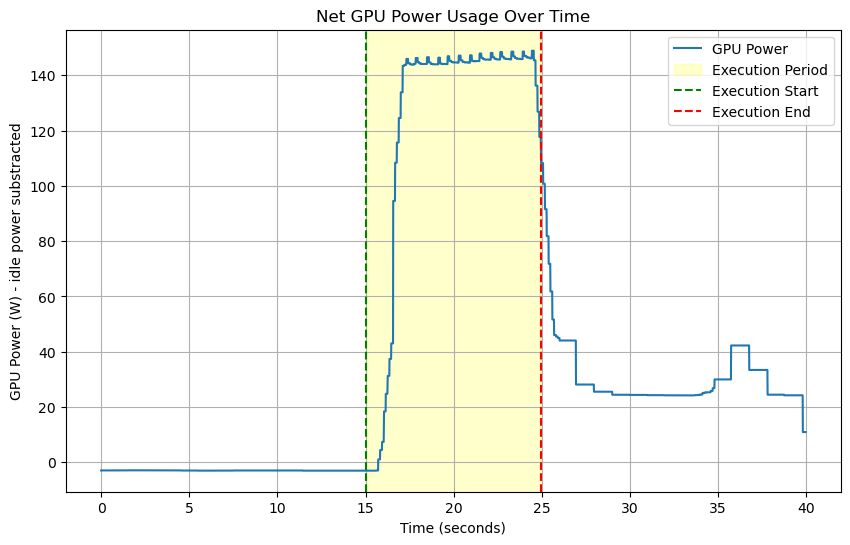

Start time: 15.002 -- End time: 24.976
Net (idle corrected) GPU energy consumption for CUDA_CUDA_gpu_net_power_results.csv:
  0.000341 kWh
  0.3407 Wh
  1226.58 J
Average GPU power: 123.01 W +/- 48.16 
 with sample standard deviation.
Net Energy During Exe Runtime:   1226.58 J
Code execution duration:  9.97 seconds
----------------------------------------------------------------------------------------------------------------------------------------

Program executed successfully!

----- >>> System check AFTER exe code...

----- GPU Memory Status:
 GPU 0: 665 MiB used, 45403 MiB free, 46068 MiB total

----- GPU State:
clocks.current.graphics [MHz], clocks.current.sm [MHz], power.draw [W], pstate
210 MHz, 210 MHz, 29.58 W, P8




----- > REFACTORED CODE < -----

Compile command: ['nvcc', '-std=c++14', '-Xcompiler', '-Wall', '-arch=sm_80', '-O3', 'test_codes/stu-matrix-rotate/stu-matrix-rotate-cuda_main-refactored.cu', '-o', 'test_codes/stu-matrix-rotate/stu-matrix-rotate-cuda_main-refac

Waiting for the system to settle down for 5 seconds...: 100%|██████████| 5/5 [00:05<00:00,  1.00s/it]


Working directory: test_codes/stu-matrix-rotate
Execute command: ['./stu-matrix-rotate-cuda_main-refactored', '30000', '100']


----- < BEGIN: STANDARD OUTPUT FROM CODE EXECUTION > -----

Average kernel execution time: 0.085663 (s)

----- < END: Standard Output > -----

GPU power data has been written to CUDA_CUDA_gpu_net_power_results.csv


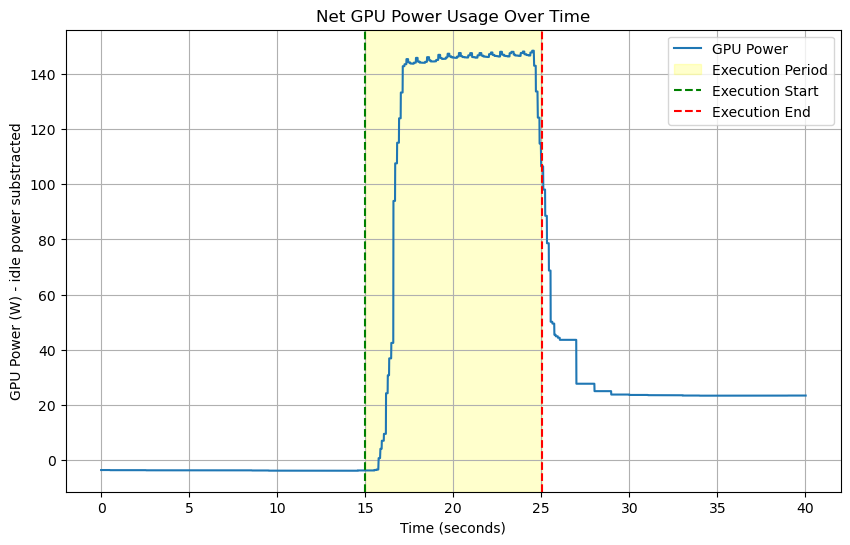

Start time: 15.002 -- End time: 25.016
Net (idle corrected) GPU energy consumption for CUDA_CUDA_gpu_net_power_results.csv:
  0.000341 kWh
  0.3412 Wh
  1228.26 J
Average GPU power: 122.81 W +/- 49.05 
 with sample standard deviation.
Net Energy During Exe Runtime:   1228.26 J
Code execution duration:  10.01 seconds
----------------------------------------------------------------------------------------------------------------------------------------

Program executed successfully!

----- >>> System check AFTER exe code...

----- GPU Memory Status:
 GPU 0: 665 MiB used, 45403 MiB free, 46068 MiB total

----- GPU State:
clocks.current.graphics [MHz], clocks.current.sm [MHz], power.draw [W], pstate
210 MHz, 210 MHz, 29.68 W, P8



COMPLETE


In [5]:
# Compile and execute source and refactored codes

print("\n\n" + color.BLUE + color.BOLD + "----- > SOURCE CODE < -----\n" + color.END)
source_compile_result, source_execute_file = lassi.code_manager.compile_code(
    sourcecode_dir,
    source_language,
    code_compiler,
    code_compiler_kwds
)

# Execute code with Energy Profiling
source_execute_result, source_exe_output, source_total_energy_joules, source_ave_power, source_std_power, source_duration, source_metrics_results_string = lassi.code_manager.execute_code(
    source_execute_file,
    exe_input_parameters,
    power_measure,
    source_language,
    target_language,
    build_script,
    wait=5
)

print("\n==================================================")

print("\n\n" + color.BLUE + color.BOLD + "----- > REFACTORED CODE < -----\n" + color.END)
refactored_compile_result, refactored_execute_file = lassi.code_manager.compile_code(
    refactoredcode_dir,
    source_language,
    code_compiler,
    code_compiler_kwds
)

# Execute code with Energy Profiling
refactored_execute_result, refactored_exe_output, refactored_total_energy_joules, refactored_ave_power, refactored_std_power, refactored_duration, refactored_metrics_results_string = lassi.code_manager.execute_code(
    refactored_execute_file,
    exe_input_parameters,
    power_measure,
    source_language,
    target_language,
    build_script,
    wait=5
)

print("\n==================================================\n")
print(color.BOLD + color.GREEN + "COMPLETE" + color.END)



----- > SOURCE CODE < -----

Compile command: ['nvcc', '-std=c++14', '-Xcompiler', '-Wall', '-arch=sm_80', '-O3', 'test_codes/stu-matrix-rotate/stu-matrix-rotate-cuda_main-refactored.cu', '-o', 'test_codes/stu-matrix-rotate/stu-matrix-rotate-cuda_main-refactored']

Compilation of code successful!


----- >>> System check BEFORE exe code...

----- GPU Memory Status:
 GPU 0: 665 MiB used, 45403 MiB free, 46068 MiB total

----- GPU State:
clocks.current.graphics [MHz], clocks.current.sm [MHz], power.draw [W], pstate
210 MHz, 210 MHz, 29.14 W, P8



Waiting for the system to settle down for 5 seconds...: 100%|██████████| 5/5 [00:05<00:00,  1.00s/it]


Working directory: test_codes/stu-matrix-rotate
Execute command: ['./stu-matrix-rotate-cuda_main-refactored', '30000', '100']


----- < BEGIN: STANDARD OUTPUT FROM CODE EXECUTION > -----

Average kernel execution time: 0.202587 (s)

----- < END: Standard Output > -----

GPU power data has been written to CUDA_CUDA_gpu_net_power_results.csv


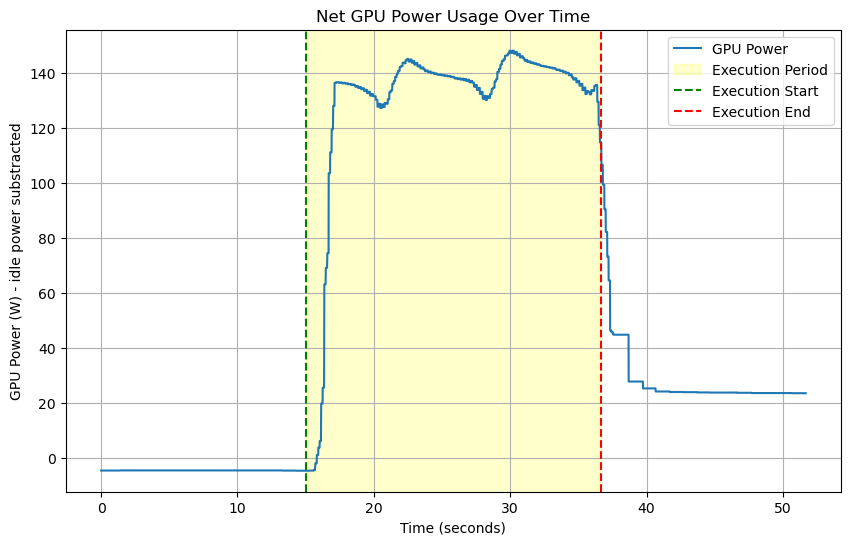

Start time: 15.015 -- End time: 36.683
Net (idle corrected) GPU energy consumption for CUDA_CUDA_gpu_net_power_results.csv:
  0.000777 kWh
  0.7766 Wh
  2795.67 J
Average GPU power: 129.00 W +/- 32.71 
 with sample standard deviation.
Net Energy During Exe Runtime:   2795.67 J
Code execution duration:  21.67 seconds
----------------------------------------------------------------------------------------------------------------------------------------

Program executed successfully!

----- >>> System check AFTER exe code...

----- GPU Memory Status:
 GPU 0: 665 MiB used, 45403 MiB free, 46068 MiB total

----- GPU State:
clocks.current.graphics [MHz], clocks.current.sm [MHz], power.draw [W], pstate
210 MHz, 210 MHz, 30.26 W, P8




----- > REFACTORED CODE < -----

Compile command: ['nvcc', '-std=c++14', '-Xcompiler', '-Wall', '-arch=sm_80', '-O3', 'test_codes/stu-matrix-rotate/stu-matrix-rotate-cuda_main-refactored.cu', '-o', 'test_codes/stu-matrix-rotate/stu-matrix-rotate-cuda_main-refa

Waiting for the system to settle down for 5 seconds...: 100%|██████████| 5/5 [00:05<00:00,  1.00s/it]


Working directory: test_codes/stu-matrix-rotate
Execute command: ['./stu-matrix-rotate-cuda_main-refactored', '30000', '100']


----- < BEGIN: STANDARD OUTPUT FROM CODE EXECUTION > -----

Average kernel execution time: 0.202634 (s)

----- < END: Standard Output > -----

GPU power data has been written to CUDA_CUDA_gpu_net_power_results.csv


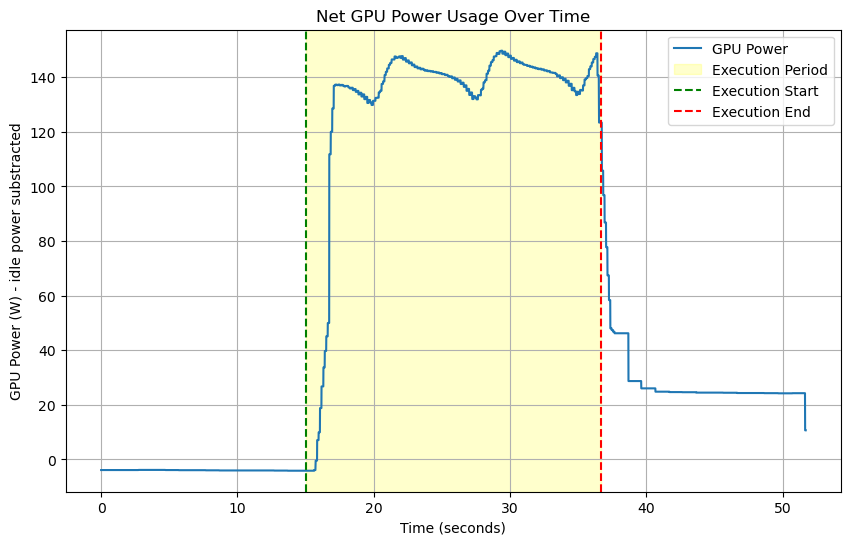

Start time: 15.015 -- End time: 36.695
Net (idle corrected) GPU energy consumption for CUDA_CUDA_gpu_net_power_results.csv:
  0.000790 kWh
  0.7896 Wh
  2842.40 J
Average GPU power: 131.10 W +/- 33.17 
 with sample standard deviation.
Net Energy During Exe Runtime:   2842.40 J
Code execution duration:  21.68 seconds
----------------------------------------------------------------------------------------------------------------------------------------

Program executed successfully!

----- >>> System check AFTER exe code...

----- GPU Memory Status:
 GPU 0: 665 MiB used, 45403 MiB free, 46068 MiB total

----- GPU State:
clocks.current.graphics [MHz], clocks.current.sm [MHz], power.draw [W], pstate
210 MHz, 210 MHz, 30.70 W, P8



COMPLETE


In [4]:
# Compile and execute source and refactored codes

print("\n\n" + color.BLUE + color.BOLD + "----- > SOURCE CODE < -----\n" + color.END)
source_compile_result, source_execute_file = lassi.code_manager.compile_code(
    sourcecode_dir,
    source_language,
    code_compiler,
    code_compiler_kwds
)

# Execute code with Energy Profiling
source_execute_result, source_exe_output, source_total_energy_joules, source_ave_power, source_std_power, source_duration, source_metrics_results_string = lassi.code_manager.execute_code(
    source_execute_file,
    exe_input_parameters,
    power_measure,
    source_language,
    target_language,
    build_script,
    wait=5
)

print("\n==================================================")

print("\n\n" + color.BLUE + color.BOLD + "----- > REFACTORED CODE < -----\n" + color.END)
refactored_compile_result, refactored_execute_file = lassi.code_manager.compile_code(
    refactoredcode_dir,
    source_language,
    code_compiler,
    code_compiler_kwds
)

# Execute code with Energy Profiling
refactored_execute_result, refactored_exe_output, refactored_total_energy_joules, refactored_ave_power, refactored_std_power, refactored_duration, refactored_metrics_results_string = lassi.code_manager.execute_code(
    refactored_execute_file,
    exe_input_parameters,
    power_measure,
    source_language,
    target_language,
    build_script,
    wait=5
)

print("\n==================================================\n")
print(color.BOLD + color.GREEN + "COMPLETE" + color.END)

# Measure system idle power (Optional)

Using same runtime as code execution above.


----- Measure system idle power...
Duration for idle time measurement: 3.08
GPU power data has been written to idle__gpu_net_power_results.csv


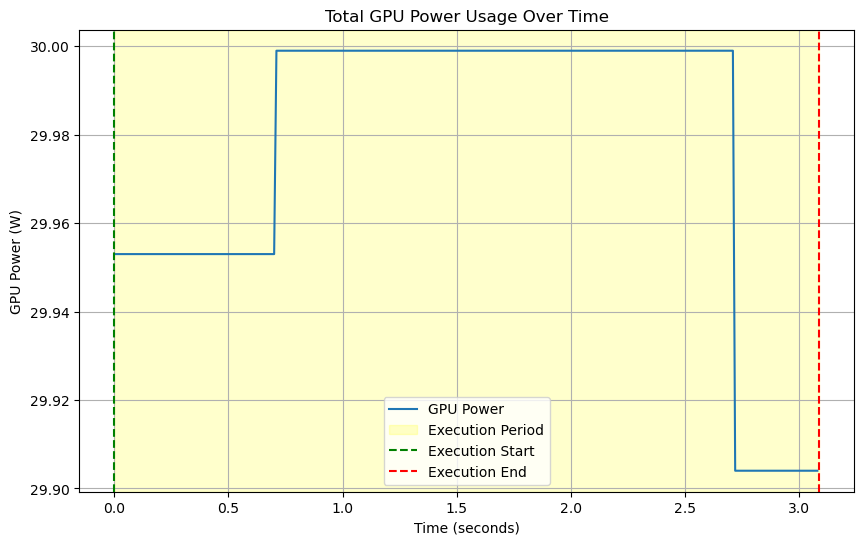

Start time: 0 -- End time: 3.087
Total GPU energy consumption for idle__gpu_net_power_results.csv:
  0.000026 kWh
  0.0257 Wh
  92.63 J
Average GPU power: 29.98 W +/- 0.03 
 with sample standard deviation.
Total Energy During Exe Runtime:   92.63 J
Code execution duration:  3.09 seconds
----------------------------------------------------------------------------------------------------------------------------------------

Idle power measured values for same runtime as jacobi-example_refactored.cu
Average GPU power: 29.98 W +/- 0.03
Total Energy During Code Runtime: 92.63 J


In [5]:
# Measure system idle power
print("\n" + color.BOLD + color.BLUE + "----- Measure system idle power..." + color.END)

idle_energy_joules, idle_ave_power, std_idle_ave_power = lassi.get_power.idlepower(refactored_duration)

print(color.BOLD + color.BLUE + "\nIdle power measured values for same runtime as " + color.END + str(refactorcode_filename))
print("Average GPU power: " + color.BOLD + f"{idle_ave_power:.2f} W +/- {std_idle_ave_power}" + color.END)
print("Total Energy During Code Runtime: " + color.BOLD + f"{idle_energy_joules:.2f} J" + color.END)

In [6]:
!nvidia-smi

Wed Apr 23 17:44:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.144.03             Driver Version: 550.144.03     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A40                     On  |   00000000:46:00.0 Off |                    0 |
|  0%   31C    P8             29W /  300W |       1MiB /  46068MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [11]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:          251Gi       7.3Gi       190Gi        13Gi        53Gi       229Gi
Swap:            0B          0B          0B


In [12]:
!accounts

Project Summary for User 'vbhargava':

Account           Balance (Hours)    Deposited (Hours)  Project
--------------  -----------------  -------------------  --------------------------------
bbvi-delta-cpu                168               622000  campus champion for university..
bbvi-delta-gpu                345                  532  campus champion for university..
